In [23]:
import pandas as pd
import numpy as np
import yaml
import math
import os
import matplotlib.pyplot as plt
import scipy.stats

min_overs = 300
min_pair_overs = 60  # 1/5th of min_overs

In [16]:
og_data = pd.read_csv('/home/pnans/Documents/Projects/Bowlership/out.csv')
bovercnt = og_data.groupby('bowler').count()
bovercnt = bovercnt.drop(['runs', 'wicket'], axis =1)
qbovercnt = bovercnt.loc[bovercnt['over'] >= min_overs]

pd.set_option('display.max_rows', 10000)
qbovercnt

,over
bowler,
A Nehra,255
A Zampa,266
AD Mathews,446
AG Cremer,327
AL Phehlukwayo,256
AU Rashid,456
Abdul Razzaq,271
Abdur Razzak,581
B Kumar,492


In [17]:
paired_data = pd.read_csv('/home/pnans/Documents/Projects/Bowlership/pair.csv')
paired_data

,runs1,wicket1,over1,bowler1,runs2,wicket2,over2,bowler2
0,10,0,1,Z Khan,2,0,2,P Kumar
1,2,0,3,Z Khan,2,0,4,P Kumar
2,1,0,5,Z Khan,2,0,6,P Kumar
3,2,0,7,Z Khan,9,0,8,P Kumar
4,5,0,9,Z Khan,8,0,10,P Kumar
...,...,...,...,...,...,...,...,...
46915,1,0,39,Kuldeep Yadav,7,0,40,YS Chahal
46916,4,0,41,Kuldeep Yadav,1,0,42,B Kumar
46917,11,0,43,YS Chahal,4,0,44,B Kumar
46918,4,0,45,YS Chahal,3,0,46,JJ Bumrah


In [18]:
pairdf = paired_data.groupby(['bowler1','bowler2']).size().append(paired_data.groupby(['bowler2','bowler1']).size())
pairdf

bowler1         bowler2      
A Beggs         GH Lewis         4
                L Maritz         3
                SM Kavanagh      2
A Bohara        KD Mills         1
                P Khadka         1
                                ..
Ziaur Rahman    Mahmudullah      6
                Mominul Haque    6
                Rubel Hossain    2
Zulfiqar Babar  Anwar Ali        5
                Shahid Afridi    1
Length: 18272, dtype: int64

In [19]:
bnames = qbovercnt.index
Bpartners = {}
for name in bnames:
    Bpartners[name] = []
    Bpartners[name] = paired_data.query('bowler1 == @name')['bowler2'].append(paired_data.query('bowler2 == @name')['bowler1']).unique()

Bpartners

{'A Nehra': array(['I Sharma', 'MM Sharma', 'RA Jadeja', 'R Ashwin', 'P Kumar',
        'Harbhajan Singh', 'R Vinay Kumar', 'A Mishra', 'RP Singh',
        'Z Khan', 'Abdul Razzaq', 'M Muralitharan', 'SK Raina', 'V Sehwag',
        'TM Odoyo', 'S Sreesanth', 'WB Rankin', 'Yuvraj Singh',
        'YK Pathan', 'MM Patel', 'PP Ojha', 'DL Vettori', 'VJ Kingma',
        'AB Agarkar'], dtype=object),
 'A Zampa': array(['AC Agar', 'KW Richardson', 'PJ Cummins', 'MA Starc',
        'JR Hazlewood', 'SM Boland', 'DJ Worrall', 'MR Marsh',
        'JP Faulkner', 'AJ Finch', 'NM Coulter-Nile', 'NM Lyon',
        'JM Mennie', 'CP Tremain', 'DJM Short', 'JW Hastings',
        'GJ Maxwell', 'MP Stoinis', 'JA Richardson', 'AJ Tye', 'TM Head',
        'MC Henriques', 'C Green', 'SA Abbott', 'JP Behrendorff'],
       dtype=object),
 'AD Mathews': array(['UWMBCA Welegedara', 'MF Maharoof', 'SMSM Senanayake',
        'RAS Lakmal', 'NLTC Perera', 'PJ Cummins', 'SL Malinga',
        'HMRKB Herath', 'KMDN Kula

In [7]:
paircnt = 0 
for k, v in Bpartners.items():
    for name in v:
        povercnt = pairdf[k][name].sum()
        if (povercnt >= min_pair_overs):
            if(k<name):
                print(k,name, povercnt)
                paircnt += 1
print(paircnt)

AD Mathews NLTC Perera 61
AD Mathews KMDN Kulasekara 61
AU Rashid MM Ali 167
AU Rashid LE Plunkett 72
Abdur Razzak Shakib Al Hasan 130
Abdur Razzak Mahmudullah 68
B Kumar JJ Bumrah 121
B Kumar Mohammed Shami 95
B Lee NW Bracken 78
CH Gayle DJ Bravo 64
DJ Bravo DJG Sammy 67
DL Vettori SB Styris 87
DL Vettori JDP Oram 66
DW Steyn M Morkel 71
Dawlat Zadran Mujeeb Ur Rahman 65
Harbhajan Singh Yuvraj Singh 93
JM Anderson TT Bresnan 86
JM Anderson SCJ Broad 166
JM Anderson ST Finn 63
JO Holder SS Cottrell 63
KD Mills TG Southee 84
KMDN Kulasekara SL Malinga 166
M Muralitharan ST Jayasuriya 61
M Ntini SM Pollock 158
MG Johnson SR Watson 64
Mahmudullah Shakib Al Hasan 89
Mashrafe Mortaza Syed Rasel 74
Mashrafe Mortaza Shakib Al Hasan 95
Mashrafe Mortaza Shahadat Hossain 60
Mashrafe Mortaza Mustafizur Rahman 67
Mohammad Hafeez Shahid Afridi 178
Mohammad Hafeez Saeed Ajmal 73
Mohammad Nabi Rashid Khan 101
P Utseya RW Price 70
R Ashwin RA Jadeja 198
Rubel Hossain Shakib Al Hasan 66
SC Williams Si

In [20]:
bocnt = 0 
Bpartner_qualified = {}
for k, v in Bpartners.items():
    Bpartner_qualified[k] = []
    for name in v:
        bocnt = pairdf[k][name].sum()
        if (bocnt >= min_pair_overs):
            Bpartner_qualified[k].append(name)

for k,v in Bpartners.items():
    if Bpartner_qualified[k] == []:
        del Bpartner_qualified[k]
            
#Bpartner_qualified
print(len(Bpartner_qualified))
print(Bpartner_qualified)

78
{'A Nehra': ['P Kumar'], 'AD Mathews': ['NLTC Perera', 'KMDN Kulasekara'], 'AG Cremer': ['Sikandar Raza'], 'AU Rashid': ['BA Stokes', 'MM Ali', 'LE Plunkett'], 'Abdul Razzaq': ['Shahid Afridi'], 'Abdur Razzak': ['Shakib Al Hasan', 'Mahmudullah', 'Mashrafe Mortaza'], 'B Kumar': ['JJ Bumrah', 'Mohammed Shami'], 'B Lee': ['MG Johnson', 'NW Bracken'], 'BA Stokes': ['AU Rashid'], 'CH Gayle': ['DJ Bravo'], 'CK Langeveldt': ['A Nel'], 'D van Niekerk': ['S Luus'], 'DJ Bravo': ['CH Gayle', 'DJG Sammy', 'SP Narine'], 'DJG Sammy': ['DJ Bravo', 'SP Narine'], 'DL Vettori': ['SB Styris', 'JDP Oram', 'JS Patel'], 'DW Steyn': ['M Morkel'], 'Dawlat Zadran': ['Mujeeb Ur Rahman'], 'E Chigumbura': ['P Utseya'], 'GP Swann': ['PD Collingwood'], 'HMRKB Herath': ['NLTC Perera'], 'Harbhajan Singh': ['Yuvraj Singh'], 'IK Pathan': ['S Sreesanth'], 'JDP Oram': ['DL Vettori'], 'JJ Bumrah': ['B Kumar'], 'JM Anderson': ['TT Bresnan', 'SCJ Broad', 'ST Finn'], 'JO Holder': ['SS Cottrell'], 'KD Mills': ['TG Southee'

In [9]:
for name in Bpartner_qualified.keys():
    dfbowler = og_data.loc[og_data['bowler'] == name]
    for pname in Bpartner_qualified[name]:
        dfpairab = paired_data.loc[paired_data['bowler1']==name] 
        dfpairab = dfpairab.loc[dfpairab['bowler2']==pname]
        dfpairba = paired_data.loc[paired_data['bowler2']==name]
        dfpairba = dfpairba.loc[dfpairba['bowler1']==pname]
        break
dfpairba

,runs1,wicket1,over1,bowler1,runs2,wicket2,over2,bowler2
5777,5,0,8,MM Patel,4,0,9,Z Khan
6286,13,0,2,MM Patel,1,1,3,Z Khan
6287,6,0,4,MM Patel,9,0,5,Z Khan
6288,2,0,6,MM Patel,5,0,7,Z Khan
6995,7,1,45,MM Patel,6,1,46,Z Khan
6996,5,0,47,MM Patel,4,0,48,Z Khan
12278,0,0,10,MM Patel,6,0,11,Z Khan
12279,4,0,12,MM Patel,9,0,13,Z Khan
12295,11,0,44,MM Patel,3,1,45,Z Khan
12296,6,0,46,MM Patel,2,1,47,Z Khan


In [21]:
dfbowler = og_data.loc[og_data['bowler'] == name]
dfbowler

,runs,wicket,over,bowler
635,3,0,11,EM Bermingham
637,7,0,13,EM Bermingham
650,7,0,26,EM Bermingham
652,11,0,28,EM Bermingham
2044,6,0,34,EM Bermingham
2046,1,1,36,EM Bermingham
2048,5,0,38,EM Bermingham
24860,5,0,20,EM Bermingham
24862,1,0,22,EM Bermingham
24864,5,0,24,EM Bermingham


A Nehra P Kumar


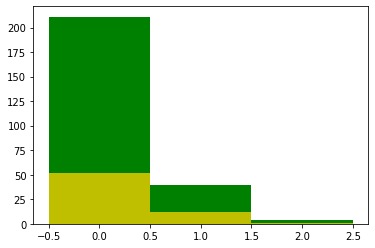

Bowler's Hitrate  :  0.18823529411764706
Bowlership's Hitrate  :  0.2153846153846154


Bowler's Skew     :  2.1720435470973105
Bowlership's Skew :  0.5758427931760394
Bowler's Kurtosis     :  4.021382946253232
Bowlership's Kurtosis :  -1.4999999999999998


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


AD Mathews NLTC Perera


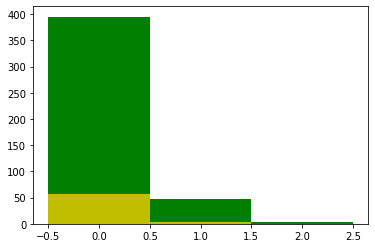

Bowler's Hitrate  :  0.1210762331838565
Bowlership's Hitrate  :  0.06557377049180328


Bowler's Skew     :  2.797968096367401
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  7.317598444578575
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


AD Mathews KMDN Kulasekara


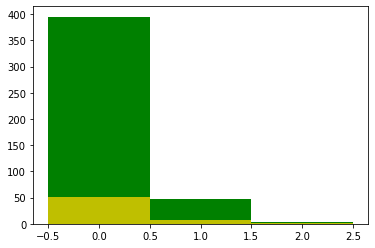

Bowler's Hitrate  :  0.1210762331838565
Bowlership's Hitrate  :  0.16393442622950818


Bowler's Skew     :  2.797968096367401
Bowlership's Skew :  0.6564508988555621
Bowler's Kurtosis     :  7.317598444578575
Bowlership's Kurtosis :  -1.4999999999999998


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


AG Cremer Sikandar Raza


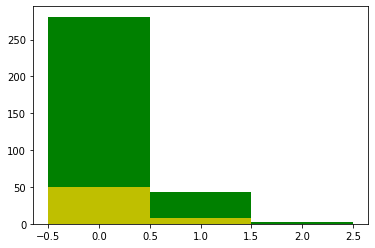

Bowler's Hitrate  :  0.14984709480122324
Bowlership's Hitrate  :  0.13793103448275862


Bowler's Skew     :  2.444557415337291
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  5.315421851743906
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


AU Rashid BA Stokes


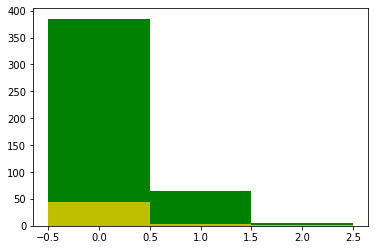

Bowler's Hitrate  :  0.16885964912280702
Bowlership's Hitrate  :  0.12


Bowler's Skew     :  2.330518504784179
Bowlership's Skew :  0.6952783089472538
Bowler's Kurtosis     :  4.799619082598738
Bowlership's Kurtosis :  -1.5000000000000004


Greater : Statistics=8.00, p=0.10 
Two-Sided : Statistics=8.00, p=0.19 
Less : Statistics=8.00, p=0.96 

____________________________________________


AU Rashid MM Ali


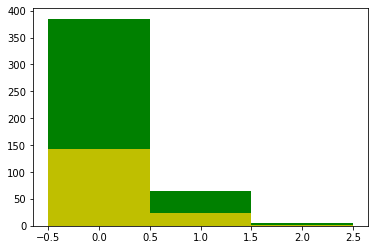

Bowler's Hitrate  :  0.16885964912280702
Bowlership's Hitrate  :  0.16167664670658682


Bowler's Skew     :  2.330518504784179
Bowlership's Skew :  0.6460623932049138
Bowler's Kurtosis     :  4.799619082598738
Bowlership's Kurtosis :  -1.4999999999999998


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


AU Rashid LE Plunkett


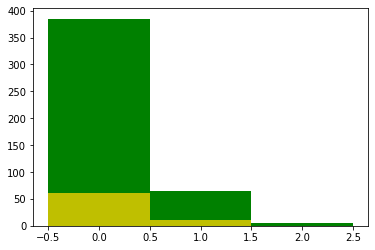

Bowler's Hitrate  :  0.16885964912280702
Bowlership's Hitrate  :  0.1527777777777778


Bowler's Skew     :  2.330518504784179
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  4.799619082598738
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


Abdul Razzaq Shahid Afridi


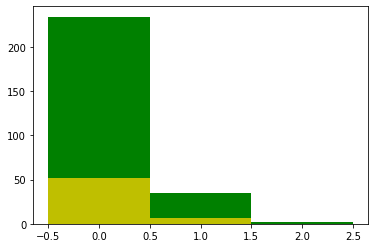

Bowler's Hitrate  :  0.14391143911439114
Bowlership's Hitrate  :  0.11864406779661017


Bowler's Skew     :  2.452018175987231
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  5.266100618305016
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


Abdur Razzak Shakib Al Hasan


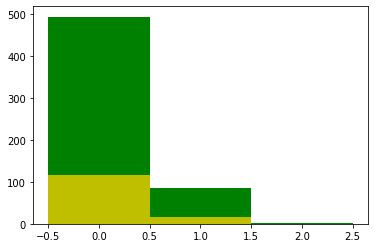

Bowler's Hitrate  :  0.1566265060240964
Bowlership's Hitrate  :  0.11538461538461539


Bowler's Skew     :  2.1739177173473014
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  3.6134635012715037
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


Abdur Razzak Mahmudullah


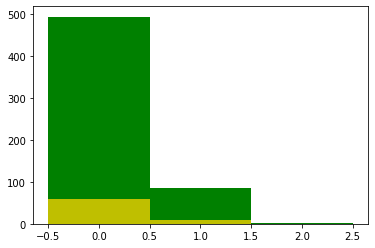

Bowler's Hitrate  :  0.1566265060240964
Bowlership's Hitrate  :  0.1323529411764706


Bowler's Skew     :  2.1739177173473014
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  3.6134635012715037
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


Abdur Razzak Mashrafe Mortaza


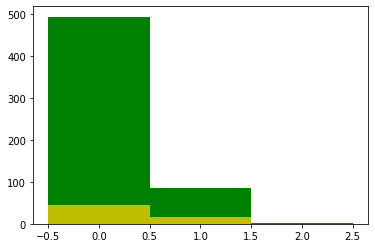

Bowler's Hitrate  :  0.1566265060240964
Bowlership's Hitrate  :  0.2542372881355932


Bowler's Skew     :  2.1739177173473014
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  3.6134635012715037
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


B Kumar JJ Bumrah


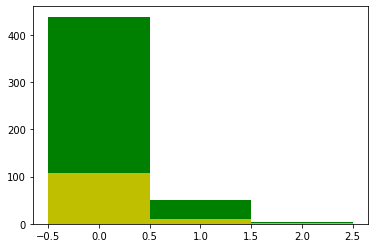

Bowler's Hitrate  :  0.11788617886178862
Bowlership's Hitrate  :  0.12396694214876033


Bowler's Skew     :  2.9377661011256833
Bowlership's Skew :  0.6884989934691097
Bowler's Kurtosis     :  8.322555177272266
Bowlership's Kurtosis :  -1.5


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


B Kumar Mohammed Shami


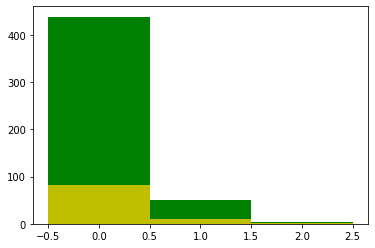

Bowler's Hitrate  :  0.11788617886178862
Bowlership's Hitrate  :  0.15789473684210525


Bowler's Skew     :  2.9377661011256833
Bowlership's Skew :  0.6737004494720303
Bowler's Kurtosis     :  8.322555177272266
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


B Lee MG Johnson


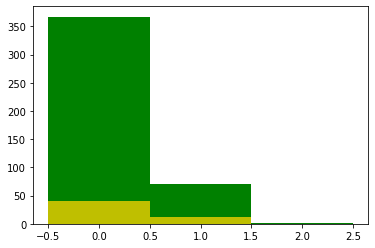

Bowler's Hitrate  :  0.16856492027334852
Bowlership's Hitrate  :  0.22641509433962265


Bowler's Skew     :  2.005122235860988
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  2.750996684213681
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


B Lee NW Bracken


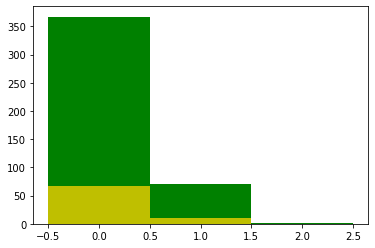

Bowler's Hitrate  :  0.16856492027334852
Bowlership's Hitrate  :  0.14102564102564102


Bowler's Skew     :  2.005122235860988
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  2.750996684213681
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


BA Stokes AU Rashid


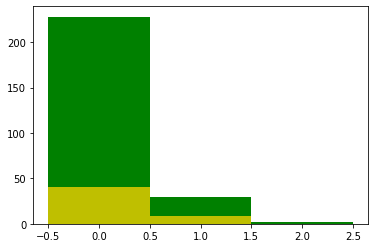

Bowler's Hitrate  :  0.1274131274131274
Bowlership's Hitrate  :  0.18


Bowler's Skew     :  2.735967503824539
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  6.985152444066525
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


CH Gayle DJ Bravo


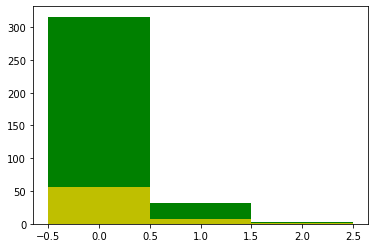

Bowler's Hitrate  :  0.10826210826210826
Bowlership's Hitrate  :  0.140625


Bowler's Skew     :  3.1683529057493365
Bowlership's Skew :  0.675778057576068
Bowler's Kurtosis     :  9.950758040816329
Bowlership's Kurtosis :  -1.5


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


CK Langeveldt A Nel


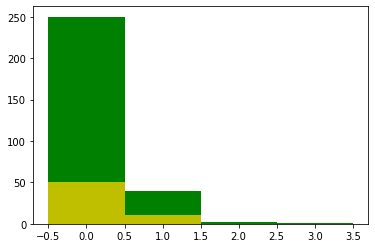

Bowler's Hitrate  :  0.15753424657534246
Bowlership's Hitrate  :  0.1774193548387097


Bowler's Skew     :  2.90230064328747
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  10.283418891166376
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.76 
Two-Sided : Statistics=3.00, p=0.82 
Less : Statistics=3.00, p=0.41 

____________________________________________


D van Niekerk S Luus


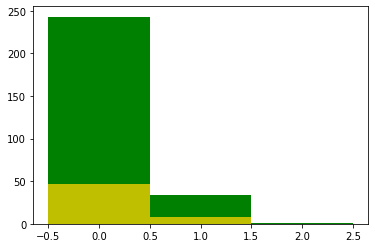

Bowler's Hitrate  :  0.12949640287769784
Bowlership's Hitrate  :  0.14545454545454545


Bowler's Skew     :  2.4638454021125304
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  4.96244511258196
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


DJ Bravo CH Gayle


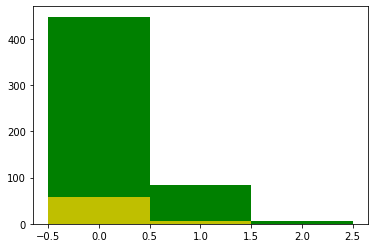

Bowler's Hitrate  :  0.1750465549348231
Bowlership's Hitrate  :  0.09375


Bowler's Skew     :  2.1258938292661713
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  3.6411433001506577
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


DJ Bravo DJG Sammy


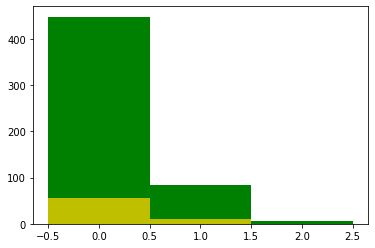

Bowler's Hitrate  :  0.1750465549348231
Bowlership's Hitrate  :  0.16417910447761194


Bowler's Skew     :  2.1258938292661713
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  3.6411433001506577
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


DJ Bravo SP Narine


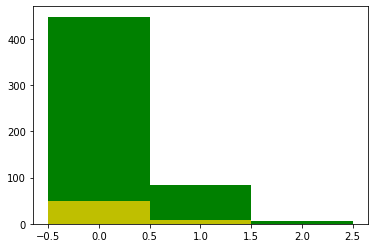

Bowler's Hitrate  :  0.1750465549348231
Bowlership's Hitrate  :  0.14035087719298245


Bowler's Skew     :  2.1258938292661713
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  3.6411433001506577
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


DJG Sammy DJ Bravo


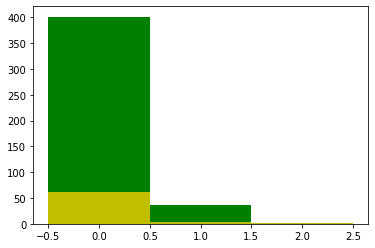

Bowler's Hitrate  :  0.0867579908675799
Bowlership's Hitrate  :  0.08955223880597014


Bowler's Skew     :  3.2152365809555152
Bowlership's Skew :  0.701056222910786
Bowler's Kurtosis     :  9.505618156998837
Bowlership's Kurtosis :  -1.4999999999999996


Greater : Statistics=5.50, p=0.41 
Two-Sided : Statistics=5.50, p=0.82 
Less : Statistics=5.50, p=0.75 

____________________________________________


DJG Sammy SP Narine


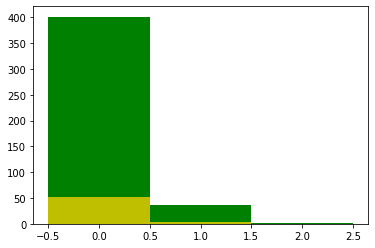

Bowler's Hitrate  :  0.0867579908675799
Bowlership's Hitrate  :  0.07272727272727272


Bowler's Skew     :  3.2152365809555152
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  9.505618156998837
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


DL Vettori SB Styris


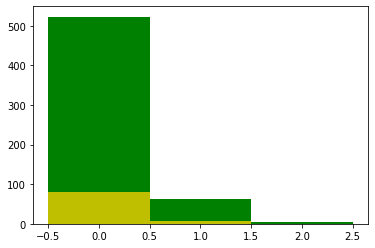

Bowler's Hitrate  :  0.12203389830508475
Bowlership's Hitrate  :  0.06896551724137931


Bowler's Skew     :  2.8740772725946724
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  7.91284811047958
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


DL Vettori JDP Oram


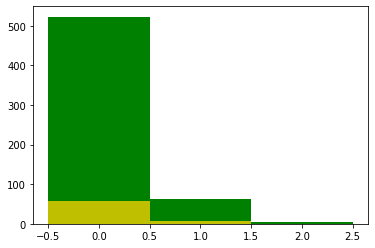

Bowler's Hitrate  :  0.12203389830508475
Bowlership's Hitrate  :  0.12121212121212122


Bowler's Skew     :  2.8740772725946724
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  7.91284811047958
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


DL Vettori JS Patel


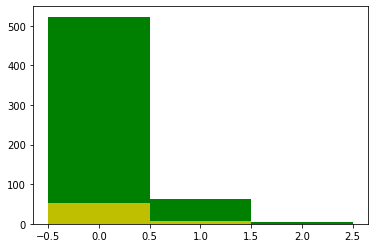

Bowler's Hitrate  :  0.12203389830508475
Bowlership's Hitrate  :  0.10344827586206896


Bowler's Skew     :  2.8740772725946724
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  7.91284811047958
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


DW Steyn M Morkel


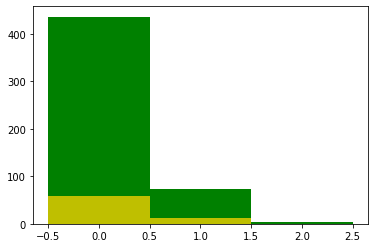

Bowler's Hitrate  :  0.15789473684210525
Bowlership's Hitrate  :  0.16901408450704225


Bowler's Skew     :  2.276870140722719
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  4.334631879368756
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


Dawlat Zadran Mujeeb Ur Rahman


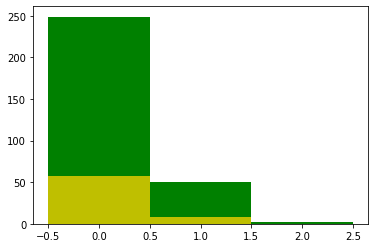

Bowler's Hitrate  :  0.17940199335548174
Bowlership's Hitrate  :  0.12307692307692308


Bowler's Skew     :  1.9767066121110277
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  2.7906246398421306
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


E Chigumbura P Utseya


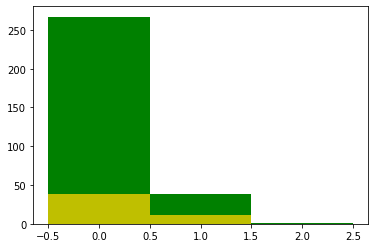

Bowler's Hitrate  :  0.13071895424836602
Bowlership's Hitrate  :  0.22


Bowler's Skew     :  2.4238528480622885
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  4.69132534197973
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


GP Swann PD Collingwood


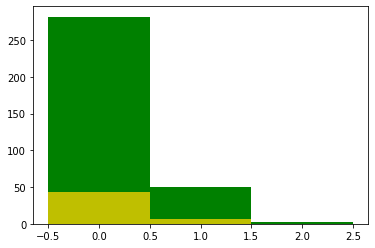

Bowler's Hitrate  :  0.16167664670658682
Bowlership's Hitrate  :  0.14


Bowler's Skew     :  2.1503453215530643
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  3.5671239154207175
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


HMRKB Herath NLTC Perera


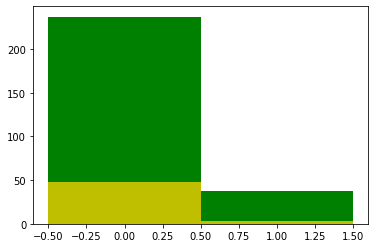

Bowler's Hitrate  :  0.13818181818181818
Bowlership's Hitrate  :  0.058823529411764705


Bowler's Skew     :  2.0969453159311935
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  2.397179658005772
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


Harbhajan Singh Yuvraj Singh


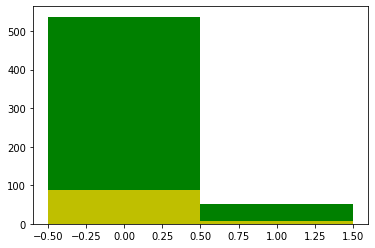

Bowler's Hitrate  :  0.08828522920203735
Bowlership's Hitrate  :  0.06451612903225806


Bowler's Skew     :  2.9023709861689113
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  6.423757341355103
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


IK Pathan S Sreesanth


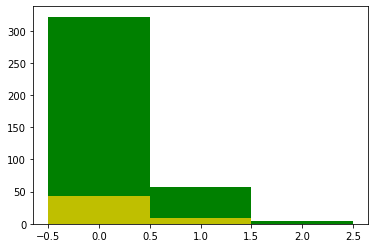

Bowler's Hitrate  :  0.17447916666666666
Bowlership's Hitrate  :  0.17307692307692307


Bowler's Skew     :  2.256418997536909
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  4.409148549970424
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


JDP Oram DL Vettori


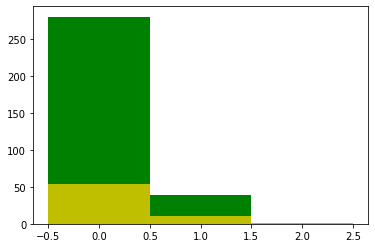

Bowler's Hitrate  :  0.128125
Bowlership's Hitrate  :  0.19696969696969696


Bowler's Skew     :  2.454291833456257
Bowlership's Skew :  0.6081196905284169
Bowler's Kurtosis     :  4.83570470997769
Bowlership's Kurtosis :  -1.4999999999999996


Greater : Statistics=5.50, p=0.41 
Two-Sided : Statistics=5.50, p=0.82 
Less : Statistics=5.50, p=0.75 

____________________________________________


JJ Bumrah B Kumar


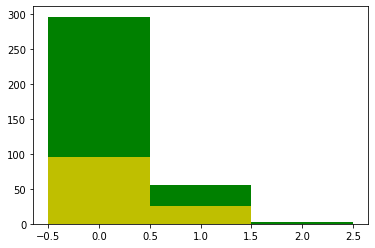

Bowler's Hitrate  :  0.1694915254237288
Bowlership's Hitrate  :  0.21487603305785125


Bowler's Skew     :  2.0439295724118574
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  3.0277760153290734
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


JM Anderson TT Bresnan


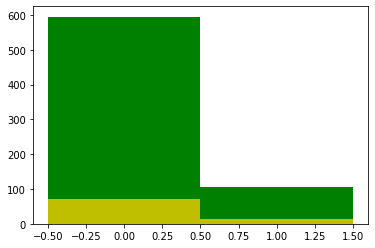

Bowler's Hitrate  :  0.15242165242165243
Bowlership's Hitrate  :  0.1744186046511628


Bowler's Skew     :  1.934057805838417
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  1.74057959632451
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.12 
Two-Sided : Statistics=4.00, p=0.25 
Less : Statistics=4.00, p=0.97 

____________________________________________


JM Anderson SCJ Broad


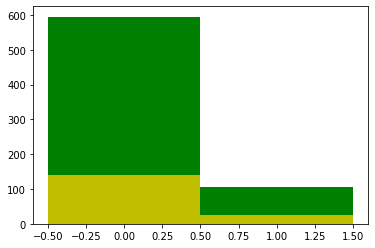

Bowler's Hitrate  :  0.15242165242165243
Bowlership's Hitrate  :  0.15060240963855423


Bowler's Skew     :  1.934057805838417
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  1.74057959632451
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


JM Anderson ST Finn


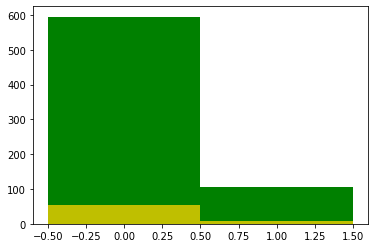

Bowler's Hitrate  :  0.15242165242165243
Bowlership's Hitrate  :  0.14285714285714285


Bowler's Skew     :  1.934057805838417
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  1.74057959632451
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.12 
Two-Sided : Statistics=4.00, p=0.25 
Less : Statistics=4.00, p=0.97 

____________________________________________


JO Holder SS Cottrell


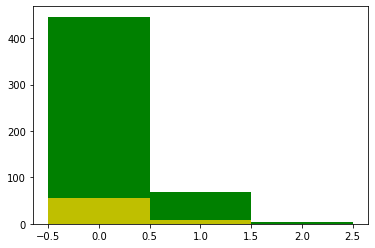

Bowler's Hitrate  :  0.14836223506743737
Bowlership's Hitrate  :  0.12698412698412698


Bowler's Skew     :  2.4025623699468306
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  5.008519495615996
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


KD Mills TG Southee


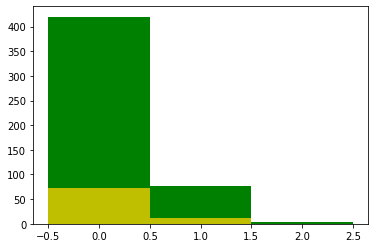

Bowler's Hitrate  :  0.168
Bowlership's Hitrate  :  0.14285714285714285


Bowler's Skew     :  2.159109940830174
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  3.7426201261369165
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


KMDN Kulasekara AD Mathews


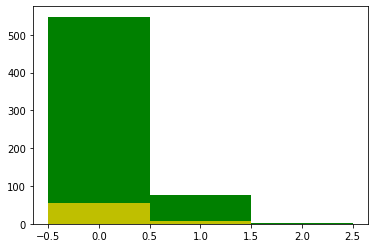

Bowler's Hitrate  :  0.1321656050955414
Bowlership's Hitrate  :  0.11475409836065574


Bowler's Skew     :  2.494489912898449
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  5.288249836298995
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


KMDN Kulasekara SL Malinga


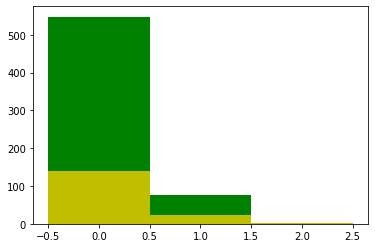

Bowler's Hitrate  :  0.1321656050955414
Bowlership's Hitrate  :  0.16265060240963855


Bowler's Skew     :  2.494489912898449
Bowlership's Skew :  0.6451351037095827
Bowler's Kurtosis     :  5.288249836298995
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


Kuldeep Yadav YS Chahal


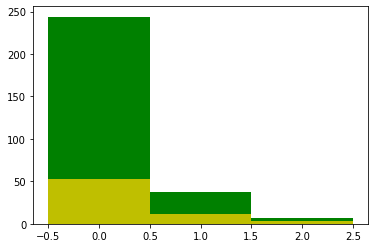

Bowler's Hitrate  :  0.17708333333333334
Bowlership's Hitrate  :  0.2537313432835821


Bowler's Skew     :  2.4993834587602675
Bowlership's Skew :  0.6371825297246353
Bowler's Kurtosis     :  5.68874336319603
Bowlership's Kurtosis :  -1.4999999999999993


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


Kuldeep Yadav RA Jadeja


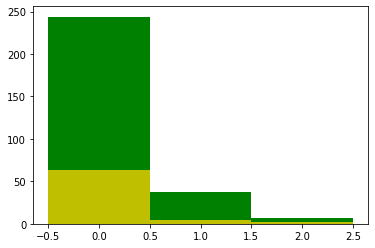

Bowler's Hitrate  :  0.17708333333333334
Bowlership's Hitrate  :  0.12857142857142856


Bowler's Skew     :  2.4993834587602675
Bowlership's Skew :  0.701056222910786
Bowler's Kurtosis     :  5.68874336319603
Bowlership's Kurtosis :  -1.4999999999999996


Greater : Statistics=7.00, p=0.19 
Two-Sided : Statistics=7.00, p=0.38 
Less : Statistics=7.00, p=0.90 

____________________________________________


LE Plunkett AU Rashid


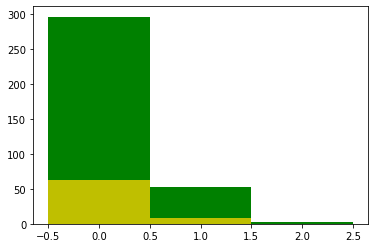

Bowler's Hitrate  :  0.16761363636363635
Bowlership's Hitrate  :  0.125


Bowler's Skew     :  2.184244231474206
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  3.895628282712673
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


LE Plunkett MM Ali


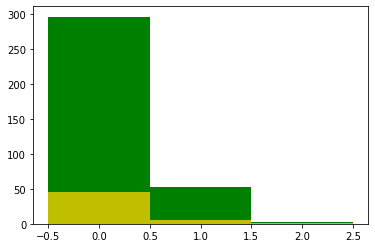

Bowler's Hitrate  :  0.16761363636363635
Bowlership's Hitrate  :  0.13725490196078433


Bowler's Skew     :  2.184244231474206
Bowlership's Skew :  0.6856675374889221
Bowler's Kurtosis     :  3.895628282712673
Bowlership's Kurtosis :  -1.5


Greater : Statistics=7.00, p=0.19 
Two-Sided : Statistics=7.00, p=0.38 
Less : Statistics=7.00, p=0.90 

____________________________________________


M Kapp S Ismail


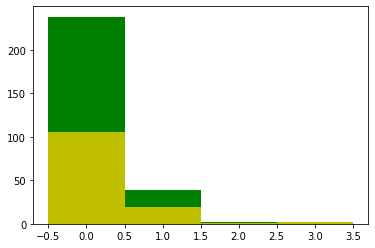

Bowler's Hitrate  :  0.17437722419928825
Bowlership's Hitrate  :  0.2109375


Bowler's Skew     :  3.081460401143331
Bowlership's Skew :  1.064852309980943
Bowler's Kurtosis     :  11.816123700470643
Bowlership's Kurtosis :  -0.7459256149570086


Greater : Statistics=10.00, p=0.33 
Two-Sided : Statistics=10.00, p=0.66 
Less : Statistics=10.00, p=0.77 

____________________________________________


M Kapp A Khaka


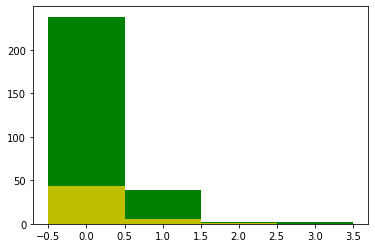

Bowler's Hitrate  :  0.17437722419928825
Bowlership's Hitrate  :  0.1568627450980392


Bowler's Skew     :  3.081460401143331
Bowlership's Skew :  0.6713138752153387
Bowler's Kurtosis     :  11.816123700470643
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=7.00, p=0.43 
Two-Sided : Statistics=7.00, p=0.86 
Less : Statistics=7.00, p=0.70 

____________________________________________


M Morkel DW Steyn


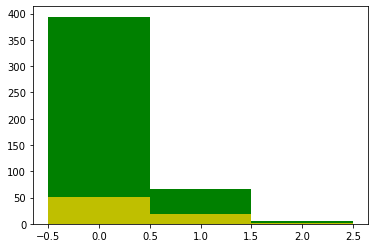

Bowler's Hitrate  :  0.16738197424892703
Bowlership's Hitrate  :  0.29577464788732394


Bowler's Skew     :  2.340488443807275
Bowlership's Skew :  0.3270379906017967
Bowler's Kurtosis     :  4.847895822468813
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=7.00, p=0.19 
Two-Sided : Statistics=7.00, p=0.38 
Less : Statistics=7.00, p=0.90 

____________________________________________


M Muralitharan ST Jayasuriya


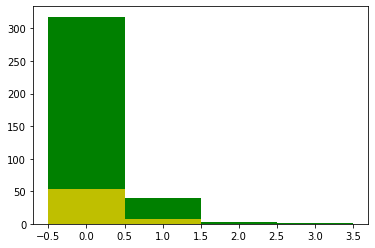

Bowler's Hitrate  :  0.13535911602209943
Bowlership's Hitrate  :  0.13114754098360656


Bowler's Skew     :  3.22859797657152
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  12.439925510639682
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.76 
Two-Sided : Statistics=3.00, p=0.82 
Less : Statistics=3.00, p=0.41 

____________________________________________


M Ntini SM Pollock


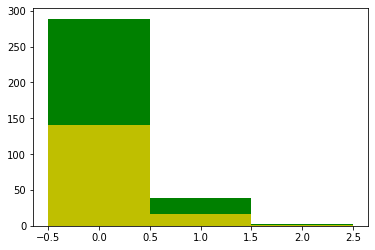

Bowler's Hitrate  :  0.13595166163141995
Bowlership's Hitrate  :  0.11392405063291139


Bowler's Skew     :  2.653994536053841
Bowlership's Skew :  0.676933330175089
Bowler's Kurtosis     :  6.539653968349246
Bowlership's Kurtosis :  -1.4999999999999996


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


MA Starc JR Hazlewood


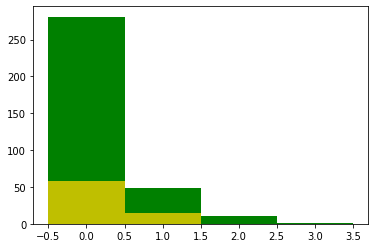

Bowler's Hitrate  :  0.2088235294117647
Bowlership's Hitrate  :  0.19444444444444445


Bowler's Skew     :  2.485888196919645
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  6.212830081143437
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.76 
Two-Sided : Statistics=3.00, p=0.82 
Less : Statistics=3.00, p=0.41 

____________________________________________


MG Johnson SR Watson


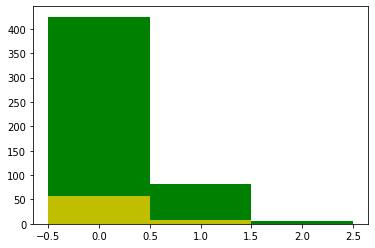

Bowler's Hitrate  :  0.18323586744639375
Bowlership's Hitrate  :  0.109375


Bowler's Skew     :  2.1132528434611353
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  3.6612831933975487
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


MG Johnson B Lee


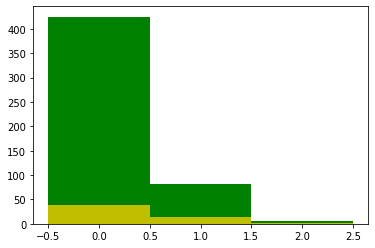

Bowler's Hitrate  :  0.18323586744639375
Bowlership's Hitrate  :  0.2830188679245283


Bowler's Skew     :  2.1132528434611353
Bowlership's Skew :  0.4158755423271221
Bowler's Kurtosis     :  3.6612831933975487
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=7.00, p=0.19 
Two-Sided : Statistics=7.00, p=0.38 
Less : Statistics=7.00, p=0.90 

____________________________________________


MM Ali AU Rashid


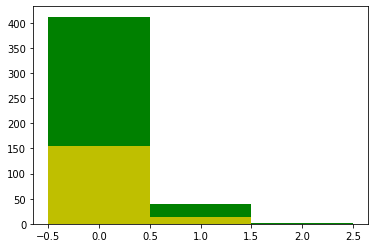

Bowler's Hitrate  :  0.09070796460176991
Bowlership's Hitrate  :  0.07784431137724551


Bowler's Skew     :  3.106539624294257
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  8.71100154874052
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


MM Ali LE Plunkett


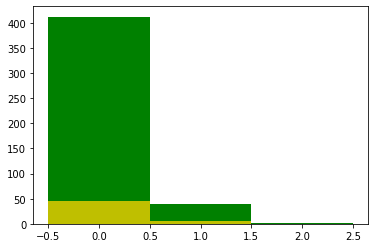

Bowler's Hitrate  :  0.09070796460176991
Bowlership's Hitrate  :  0.11764705882352941


Bowler's Skew     :  3.106539624294257
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  8.71100154874052
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


MM Patel Z Khan


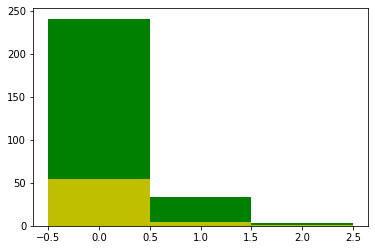

Bowler's Hitrate  :  0.14388489208633093
Bowlership's Hitrate  :  0.1


Bowler's Skew     :  2.5992330458159296
Bowlership's Skew :  0.6993411305021355
Bowler's Kurtosis     :  6.264543360659292
Bowlership's Kurtosis :  -1.5


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


Mahmudullah Abdur Razzak


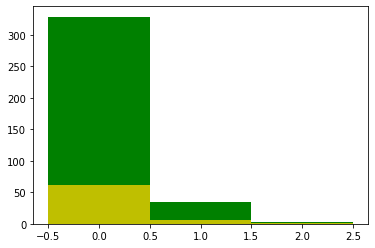

Bowler's Hitrate  :  0.1092896174863388
Bowlership's Hitrate  :  0.11764705882352941


Bowler's Skew     :  3.125062471221728
Bowlership's Skew :  0.6892054981428749
Bowler's Kurtosis     :  9.626758583479551
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


Mahmudullah Shakib Al Hasan


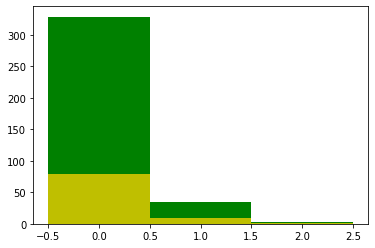

Bowler's Hitrate  :  0.1092896174863388
Bowlership's Hitrate  :  0.12359550561797752


Bowler's Skew     :  3.125062471221728
Bowlership's Skew :  0.6795577312909907
Bowler's Kurtosis     :  9.626758583479551
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


Mashrafe Mortaza Syed Rasel


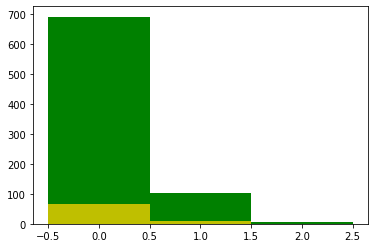

Bowler's Hitrate  :  0.14713216957605985
Bowlership's Hitrate  :  0.12162162162162163


Bowler's Skew     :  2.4651559575597495
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  5.412601934781787
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


Mashrafe Mortaza Abdur Razzak


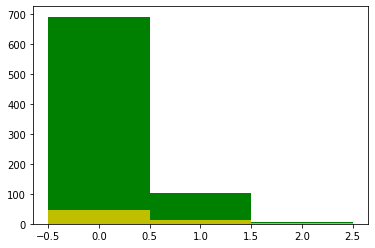

Bowler's Hitrate  :  0.14713216957605985
Bowlership's Hitrate  :  0.2711864406779661


Bowler's Skew     :  2.4651559575597495
Bowlership's Skew :  0.5532681165148897
Bowler's Kurtosis     :  5.412601934781787
Bowlership's Kurtosis :  -1.5000000000000004


Greater : Statistics=7.00, p=0.19 
Two-Sided : Statistics=7.00, p=0.38 
Less : Statistics=7.00, p=0.90 

____________________________________________


Mashrafe Mortaza Shakib Al Hasan


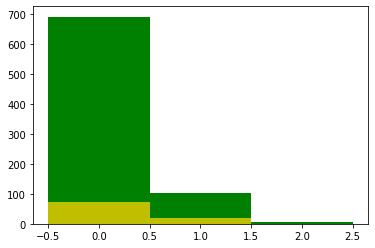

Bowler's Hitrate  :  0.14713216957605985
Bowlership's Hitrate  :  0.23157894736842105


Bowler's Skew     :  2.4651559575597495
Bowlership's Skew :  0.5122212363116111
Bowler's Kurtosis     :  5.412601934781787
Bowlership's Kurtosis :  -1.5


Greater : Statistics=7.00, p=0.19 
Two-Sided : Statistics=7.00, p=0.38 
Less : Statistics=7.00, p=0.90 

____________________________________________


Mashrafe Mortaza Shahadat Hossain


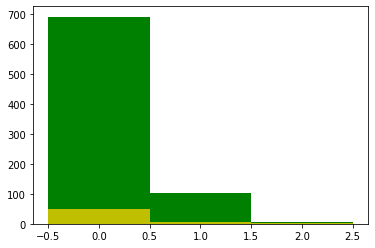

Bowler's Hitrate  :  0.14713216957605985
Bowlership's Hitrate  :  0.18333333333333332


Bowler's Skew     :  2.4651559575597495
Bowlership's Skew :  0.6798495642742518
Bowler's Kurtosis     :  5.412601934781787
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=7.50, p=0.13 
Two-Sided : Statistics=7.50, p=0.27 
Less : Statistics=7.50, p=0.94 

____________________________________________


Mashrafe Mortaza Mustafizur Rahman


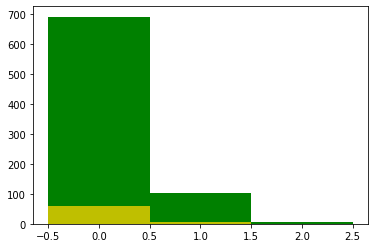

Bowler's Hitrate  :  0.14713216957605985
Bowlership's Hitrate  :  0.11940298507462686


Bowler's Skew     :  2.4651559575597495
Bowlership's Skew :  0.6885715037642969
Bowler's Kurtosis     :  5.412601934781787
Bowlership's Kurtosis :  -1.4999999999999998


Greater : Statistics=8.00, p=0.10 
Two-Sided : Statistics=8.00, p=0.19 
Less : Statistics=8.00, p=0.96 

____________________________________________


Mohammad Hafeez Shahid Afridi


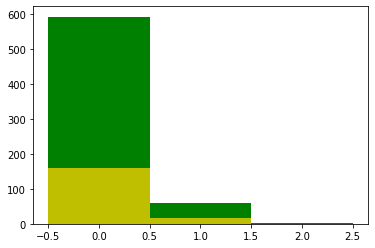

Bowler's Hitrate  :  0.09770992366412214
Bowlership's Hitrate  :  0.10112359550561797


Bowler's Skew     :  3.0218601642242153
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  8.34072577937461
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


Mohammad Hafeez Saeed Ajmal


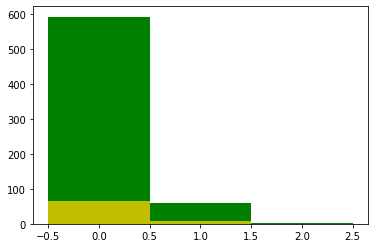

Bowler's Hitrate  :  0.09770992366412214
Bowlership's Hitrate  :  0.0958904109589041


Bowler's Skew     :  3.0218601642242153
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  8.34072577937461
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


Mohammad Hafeez Wahab Riaz


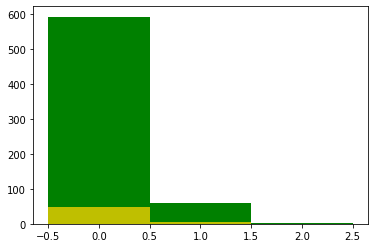

Bowler's Hitrate  :  0.09770992366412214
Bowlership's Hitrate  :  0.07547169811320754


Bowler's Skew     :  3.0218601642242153
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  8.34072577937461
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


Mohammad Nabi Rashid Khan


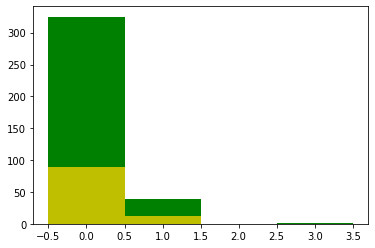

Bowler's Hitrate  :  0.11506849315068493
Bowlership's Hitrate  :  0.1188118811881188


Bowler's Skew     :  3.404648592174651
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  15.264349397620627
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


Mohammed Shami UT Yadav


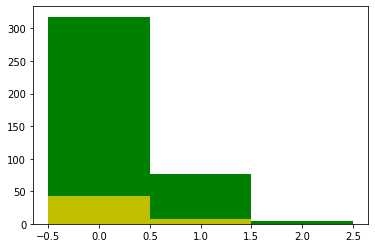

Bowler's Hitrate  :  0.21105527638190955
Bowlership's Hitrate  :  0.16


Bowler's Skew     :  1.7838152504629714
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  2.125833029676574
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


Mohammed Shami B Kumar


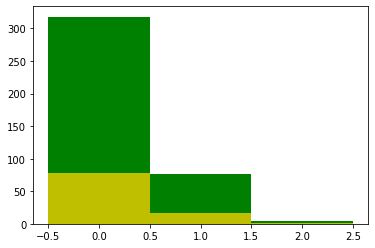

Bowler's Hitrate  :  0.21105527638190955
Bowlership's Hitrate  :  0.18947368421052632


Bowler's Skew     :  1.7838152504629714
Bowlership's Skew :  0.6012163558882203
Bowler's Kurtosis     :  2.125833029676574
Bowlership's Kurtosis :  -1.4999999999999998


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


Mohammed Shami RA Jadeja


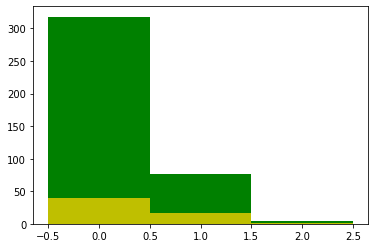

Bowler's Hitrate  :  0.21105527638190955
Bowlership's Hitrate  :  0.3333333333333333


Bowler's Skew     :  1.7838152504629714
Bowlership's Skew :  0.19046593348013158
Bowler's Kurtosis     :  2.125833029676574
Bowlership's Kurtosis :  -1.4999999999999998


Greater : Statistics=7.00, p=0.19 
Two-Sided : Statistics=7.00, p=0.38 
Less : Statistics=7.00, p=0.90 

____________________________________________


NLTC Perera SL Malinga


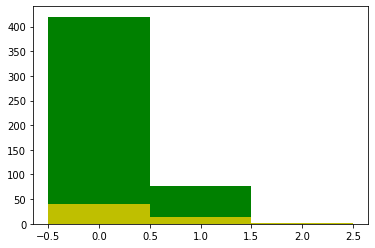

Bowler's Hitrate  :  0.1623246492985972
Bowlership's Hitrate  :  0.2727272727272727


Bowler's Skew     :  2.049360786036403
Bowlership's Skew :  0.4451092653236364
Bowler's Kurtosis     :  2.8973388147737085
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=7.00, p=0.19 
Two-Sided : Statistics=7.00, p=0.38 
Less : Statistics=7.00, p=0.90 

____________________________________________


NLTC Perera HMRKB Herath


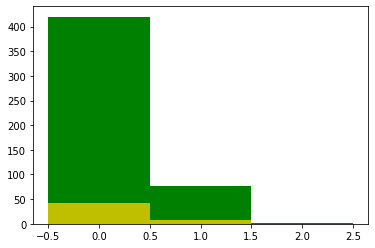

Bowler's Hitrate  :  0.1623246492985972
Bowlership's Hitrate  :  0.1568627450980392


Bowler's Skew     :  2.049360786036403
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  2.8973388147737085
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


NLTC Perera AD Mathews


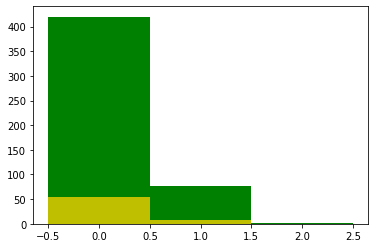

Bowler's Hitrate  :  0.1623246492985972
Bowlership's Hitrate  :  0.11475409836065574


Bowler's Skew     :  2.049360786036403
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  2.8973388147737085
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


NW Bracken B Lee


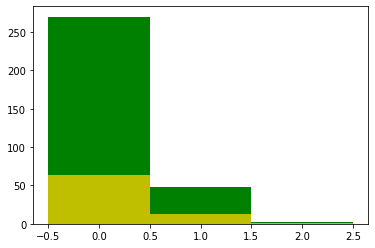

Bowler's Hitrate  :  0.1625
Bowlership's Hitrate  :  0.19230769230769232


Bowler's Skew     :  2.1520627486073693
Bowlership's Skew :  0.6061201421137349
Bowler's Kurtosis     :  3.595743481044358
Bowlership's Kurtosis :  -1.5


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


P Kumar A Nehra


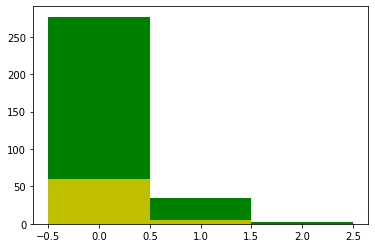

Bowler's Hitrate  :  0.12140575079872204
Bowlership's Hitrate  :  0.07692307692307693


Bowler's Skew     :  2.772434493059388
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  7.128181011147303
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


P Utseya E Chigumbura


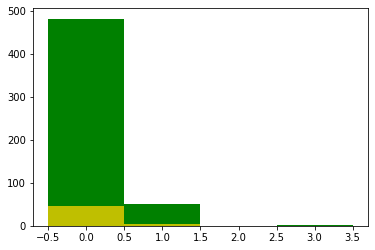

Bowler's Hitrate  :  0.10112359550561797
Bowlership's Hitrate  :  0.08


Bowler's Skew     :  3.494126854072817
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  15.663868011447235
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


P Utseya RW Price


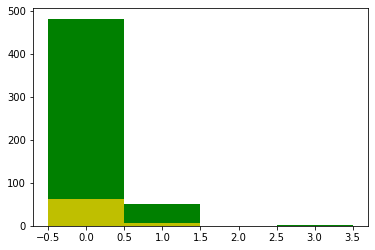

Bowler's Hitrate  :  0.10112359550561797
Bowlership's Hitrate  :  0.1


Bowler's Skew     :  3.494126854072817
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  15.663868011447235
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


PD Collingwood GP Swann


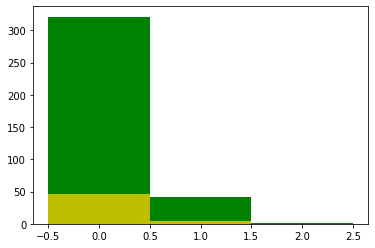

Bowler's Hitrate  :  0.1184573002754821
Bowlership's Hitrate  :  0.08


Bowler's Skew     :  2.5858743968009366
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  5.515114394681666
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


R Ashwin RA Jadeja


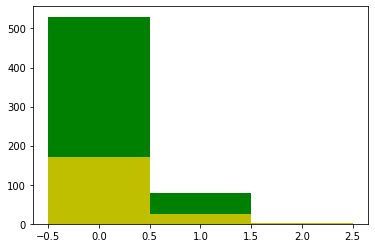

Bowler's Hitrate  :  0.13278688524590163
Bowlership's Hitrate  :  0.13636363636363635


Bowler's Skew     :  2.284288322536255
Bowlership's Skew :  0.6540225529581273
Bowler's Kurtosis     :  3.6621468712379075
Bowlership's Kurtosis :  -1.5


Greater : Statistics=5.50, p=0.41 
Two-Sided : Statistics=5.50, p=0.82 
Less : Statistics=5.50, p=0.75 

____________________________________________


RA Jadeja R Ashwin


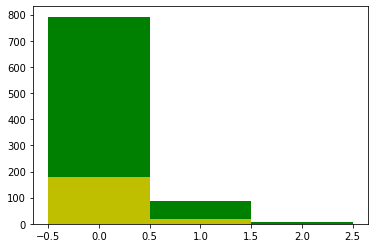

Bowler's Hitrate  :  0.11286681715575621
Bowlership's Hitrate  :  0.10606060606060606


Bowler's Skew     :  2.9634007153259336
Bowlership's Skew :  0.6800415614518426
Bowler's Kurtosis     :  8.4191573484928
Bowlership's Kurtosis :  -1.5


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


RA Jadeja Mohammed Shami


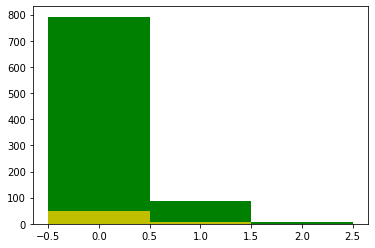

Bowler's Hitrate  :  0.11286681715575621
Bowlership's Hitrate  :  0.14035087719298245


Bowler's Skew     :  2.9634007153259336
Bowlership's Skew :  0.6798495642742518
Bowler's Kurtosis     :  8.4191573484928
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=7.50, p=0.13 
Two-Sided : Statistics=7.50, p=0.27 
Less : Statistics=7.50, p=0.94 

____________________________________________


RA Jadeja Kuldeep Yadav


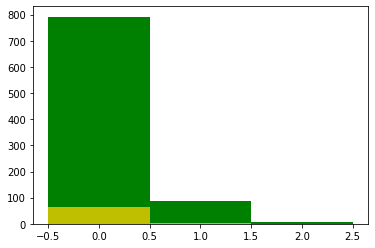

Bowler's Hitrate  :  0.11286681715575621
Bowlership's Hitrate  :  0.05714285714285714


Bowler's Skew     :  2.9634007153259336
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  8.4191573484928
Bowlership's Kurtosis :  -2.0


Greater : Statistics=5.00, p=0.19 
Two-Sided : Statistics=5.00, p=0.39 
Less : Statistics=5.00, p=0.93 

____________________________________________


RAS Lakmal SL Malinga


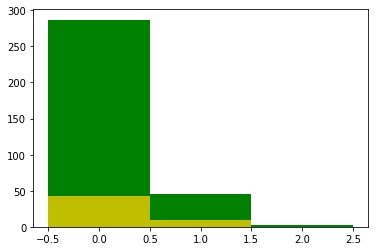

Bowler's Hitrate  :  0.1467065868263473
Bowlership's Hitrate  :  0.17647058823529413


Bowler's Skew     :  2.3448201219915976
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  4.572824746849169
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


Rashid Khan Mohammad Nabi


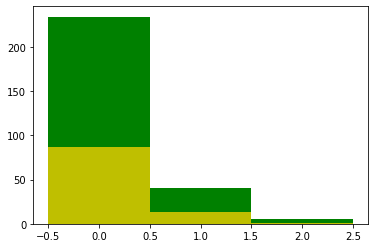

Bowler's Hitrate  :  0.18214285714285713
Bowlership's Hitrate  :  0.1485148514851485


Bowler's Skew     :  2.297308741825748
Bowlership's Skew :  0.6546684894818376
Bowler's Kurtosis     :  4.6653035265102965
Bowlership's Kurtosis :  -1.4999999999999991


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


Rubel Hossain Shakib Al Hasan


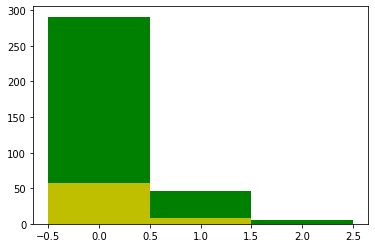

Bowler's Hitrate  :  0.16374269005847952
Bowlership's Hitrate  :  0.12121212121212122


Bowler's Skew     :  2.4424127147774417
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  5.423987439835042
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


S Ismail M Kapp


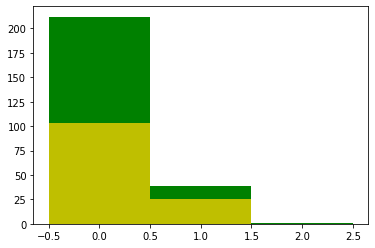

Bowler's Hitrate  :  0.1626984126984127
Bowlership's Hitrate  :  0.1953125


Bowler's Skew     :  2.043116826191073
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  2.864068943115427
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


SC Williams Sikandar Raza


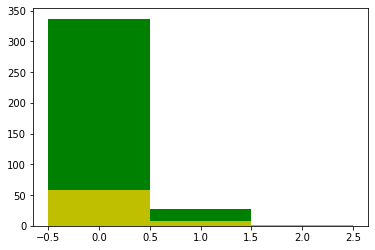

Bowler's Hitrate  :  0.08719346049046321
Bowlership's Hitrate  :  0.13636363636363635


Bowler's Skew     :  3.510469881997215
Bowlership's Skew :  0.6780261313949151
Bowler's Kurtosis     :  12.384402510757782
Bowlership's Kurtosis :  -1.5


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


SCJ Broad TT Bresnan


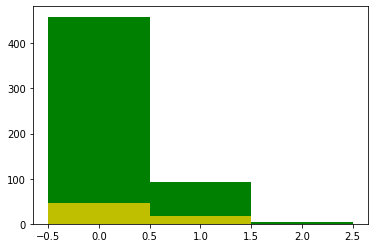

Bowler's Hitrate  :  0.18165467625899281
Bowlership's Hitrate  :  0.27692307692307694


Bowler's Skew     :  1.9741975945541945
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  2.8142481780764665
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


SCJ Broad JM Anderson


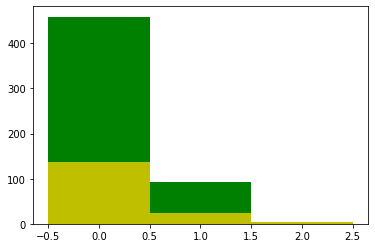

Bowler's Hitrate  :  0.18165467625899281
Bowlership's Hitrate  :  0.18674698795180722


Bowler's Skew     :  1.9741975945541945
Bowlership's Skew :  0.634427542772102
Bowler's Kurtosis     :  2.8142481780764665
Bowlership's Kurtosis :  -1.5


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


SL Malinga RAS Lakmal


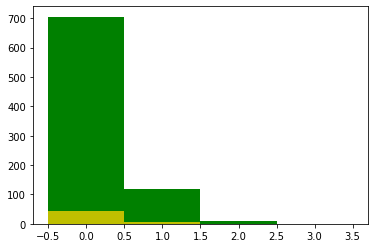

Bowler's Hitrate  :  0.16906474820143885
Bowlership's Hitrate  :  0.13725490196078433


Bowler's Skew     :  2.5012418629489304
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  6.499096643767675
Bowlership's Kurtosis :  -2.0


Greater : Statistics=5.00, p=0.41 
Two-Sided : Statistics=5.00, p=0.82 
Less : Statistics=5.00, p=0.76 

____________________________________________


SL Malinga WPUJC Vaas


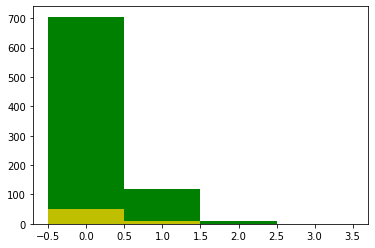

Bowler's Hitrate  :  0.16906474820143885
Bowlership's Hitrate  :  0.13793103448275862


Bowler's Skew     :  2.5012418629489304
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  6.499096643767675
Bowlership's Kurtosis :  -2.0


Greater : Statistics=5.00, p=0.41 
Two-Sided : Statistics=5.00, p=0.82 
Less : Statistics=5.00, p=0.76 

____________________________________________


SL Malinga KMDN Kulasekara


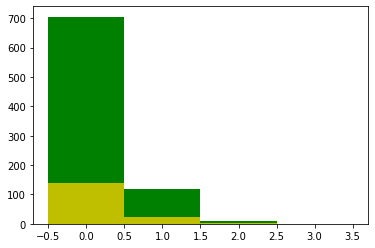

Bowler's Hitrate  :  0.16906474820143885
Bowlership's Hitrate  :  0.1686746987951807


Bowler's Skew     :  2.5012418629489304
Bowlership's Skew :  0.6377149087095159
Bowler's Kurtosis     :  6.499096643767675
Bowlership's Kurtosis :  -1.5000000000000004


Greater : Statistics=6.00, p=0.57 
Two-Sided : Statistics=6.00, p=0.86 
Less : Statistics=6.00, p=0.57 

____________________________________________


SL Malinga NLTC Perera


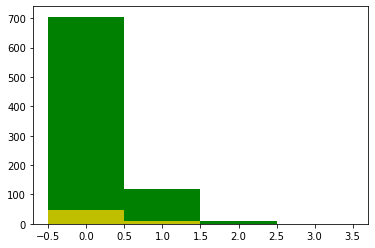

Bowler's Hitrate  :  0.16906474820143885
Bowlership's Hitrate  :  0.14545454545454545


Bowler's Skew     :  2.5012418629489304
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  6.499096643767675
Bowlership's Kurtosis :  -2.0


Greater : Statistics=5.00, p=0.41 
Two-Sided : Statistics=5.00, p=0.82 
Less : Statistics=5.00, p=0.76 

____________________________________________


SM Pollock M Ntini


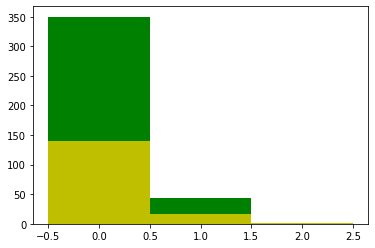

Bowler's Hitrate  :  0.11645569620253164
Bowlership's Hitrate  :  0.12025316455696203


Bowler's Skew     :  2.6035041879883325
Bowlership's Skew :  0.6720629029002243
Bowler's Kurtosis     :  5.572628688836742
Bowlership's Kurtosis :  -1.4999999999999996


Greater : Statistics=5.50, p=0.41 
Two-Sided : Statistics=5.50, p=0.82 
Less : Statistics=5.50, p=0.75 

____________________________________________


SP Narine DJ Bravo


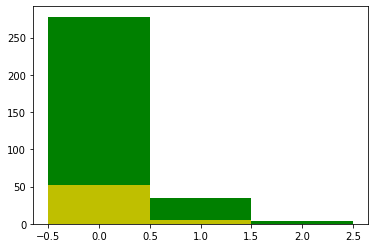

Bowler's Hitrate  :  0.13291139240506328
Bowlership's Hitrate  :  0.08771929824561403


Bowler's Skew     :  2.8551830897865096
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  7.87780848676298
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


SP Narine DJG Sammy


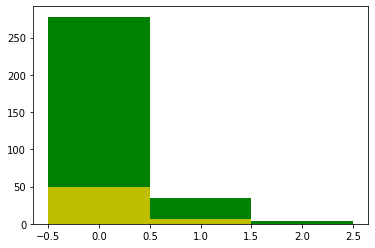

Bowler's Hitrate  :  0.13291139240506328
Bowlership's Hitrate  :  0.10909090909090909


Bowler's Skew     :  2.8551830897865096
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  7.87780848676298
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


SR Watson MG Johnson


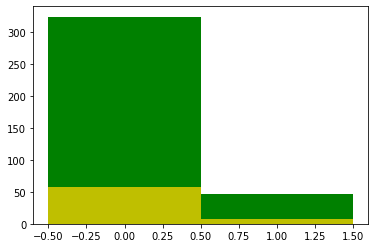

Bowler's Hitrate  :  0.12668463611859837
Bowlership's Hitrate  :  0.109375


Bowler's Skew     :  2.2447001469398224
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  3.0386787496716616
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


ST Finn JM Anderson


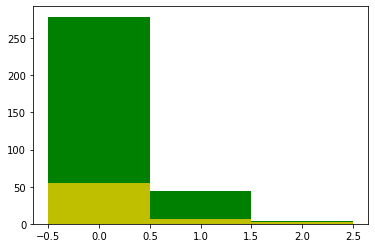

Bowler's Hitrate  :  0.15902140672782875
Bowlership's Hitrate  :  0.15873015873015872


Bowler's Skew     :  2.4303666188893414
Bowlership's Skew :  0.6925217744044175
Bowler's Kurtosis     :  5.325501213596777
Bowlership's Kurtosis :  -1.4999999999999998


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


Saeed Ajmal Shahid Afridi


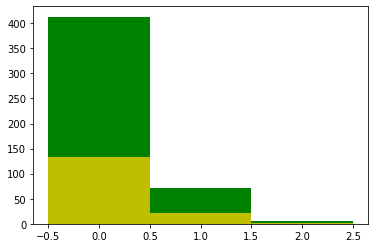

Bowler's Hitrate  :  0.1710794297352342
Bowlership's Hitrate  :  0.15286624203821655


Bowler's Skew     :  2.2727852362489394
Bowlership's Skew :  0.6391055333421796
Bowler's Kurtosis     :  4.4776170563065465
Bowlership's Kurtosis :  -1.4999999999999998


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


Saeed Ajmal Umar Gul


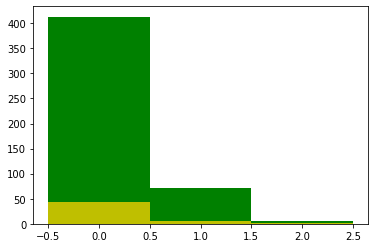

Bowler's Hitrate  :  0.1710794297352342
Bowlership's Hitrate  :  0.16


Bowler's Skew     :  2.2727852362489394
Bowlership's Skew :  0.6695094926428982
Bowler's Kurtosis     :  4.4776170563065465
Bowlership's Kurtosis :  -1.5000000000000007


Greater : Statistics=7.50, p=0.13 
Two-Sided : Statistics=7.50, p=0.27 
Less : Statistics=7.50, p=0.94 

____________________________________________


Saeed Ajmal Mohammad Hafeez


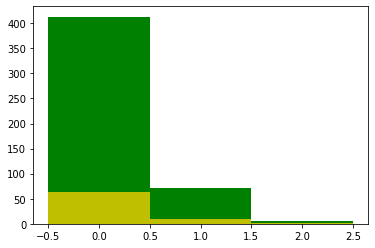

Bowler's Hitrate  :  0.1710794297352342
Bowlership's Hitrate  :  0.1506849315068493


Bowler's Skew     :  2.2727852362489394
Bowlership's Skew :  0.6626059534903224
Bowler's Kurtosis     :  4.4776170563065465
Bowlership's Kurtosis :  -1.4999999999999998


Greater : Statistics=7.00, p=0.19 
Two-Sided : Statistics=7.00, p=0.38 
Less : Statistics=7.00, p=0.90 

____________________________________________


Shahid Afridi Mohammad Hafeez


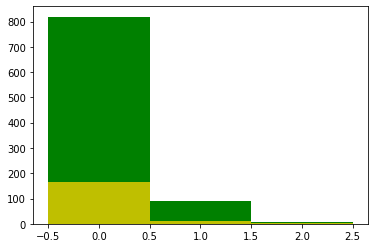

Bowler's Hitrate  :  0.1134133042529989
Bowlership's Hitrate  :  0.07865168539325842


Bowler's Skew     :  2.938078193796116
Bowlership's Skew :  0.7011563791386245
Bowler's Kurtosis     :  8.230451829339811
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


Shahid Afridi Saeed Ajmal


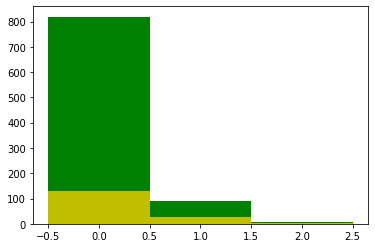

Bowler's Hitrate  :  0.1134133042529989
Bowlership's Hitrate  :  0.18471337579617833


Bowler's Skew     :  2.938078193796116
Bowlership's Skew :  0.6178083179368293
Bowler's Kurtosis     :  8.230451829339811
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


Shahid Afridi Abdul Razzaq


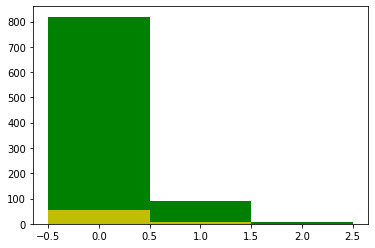

Bowler's Hitrate  :  0.1134133042529989
Bowlership's Hitrate  :  0.1016949152542373


Bowler's Skew     :  2.938078193796116
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  8.230451829339811
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.50, p=0.28 
Two-Sided : Statistics=4.50, p=0.55 
Less : Statistics=4.50, p=0.88 

____________________________________________


Shahid Afridi Shoaib Malik


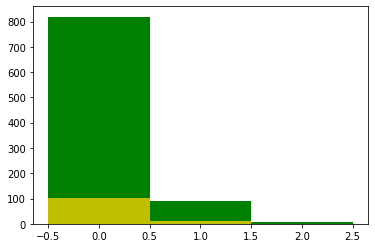

Bowler's Hitrate  :  0.1134133042529989
Bowlership's Hitrate  :  0.10434782608695652


Bowler's Skew     :  2.938078193796116
Bowlership's Skew :  0.6873584042177485
Bowler's Kurtosis     :  8.230451829339811
Bowlership's Kurtosis :  -1.5000000000000004


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


Shakib Al Hasan Mahmudullah


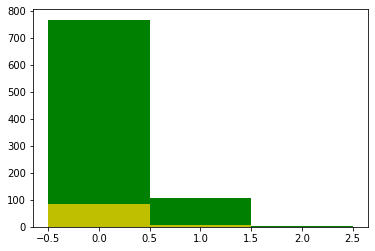

Bowler's Hitrate  :  0.13097949886104784
Bowlership's Hitrate  :  0.06741573033707865


Bowler's Skew     :  2.500038168092966
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  5.294391056339231
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


Shakib Al Hasan Rubel Hossain


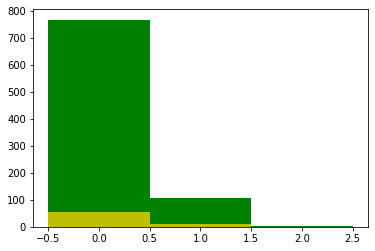

Bowler's Hitrate  :  0.13097949886104784
Bowlership's Hitrate  :  0.16666666666666666


Bowler's Skew     :  2.500038168092966
Bowlership's Skew :  0.649886323088921
Bowler's Kurtosis     :  5.294391056339231
Bowlership's Kurtosis :  -1.4999999999999996


Greater : Statistics=7.00, p=0.19 
Two-Sided : Statistics=7.00, p=0.38 
Less : Statistics=7.00, p=0.90 

____________________________________________


Shakib Al Hasan Mashrafe Mortaza


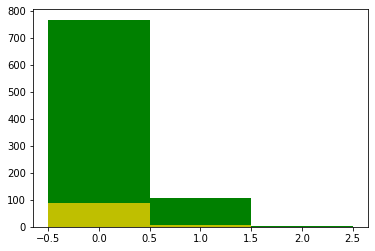

Bowler's Hitrate  :  0.13097949886104784
Bowlership's Hitrate  :  0.09473684210526316


Bowler's Skew     :  2.500038168092966
Bowlership's Skew :  0.6947045842350846
Bowler's Kurtosis     :  5.294391056339231
Bowlership's Kurtosis :  -1.5


Greater : Statistics=7.00, p=0.19 
Two-Sided : Statistics=7.00, p=0.38 
Less : Statistics=7.00, p=0.90 

____________________________________________


Shakib Al Hasan Abdur Razzak


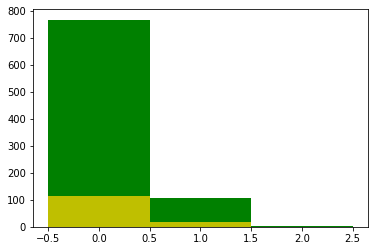

Bowler's Hitrate  :  0.13097949886104784
Bowlership's Hitrate  :  0.13846153846153847


Bowler's Skew     :  2.500038168092966
Bowlership's Skew :  0.6589922250963455
Bowler's Kurtosis     :  5.294391056339231
Bowlership's Kurtosis :  -1.5000000000000004


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


Shakib Al Hasan Mohammad Rafique


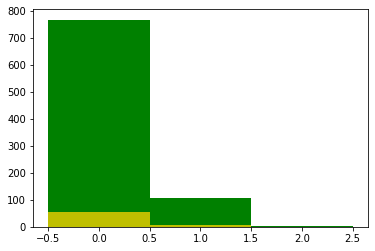

Bowler's Hitrate  :  0.13097949886104784
Bowlership's Hitrate  :  0.0847457627118644


Bowler's Skew     :  2.500038168092966
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  5.294391056339231
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


Shoaib Malik Shahid Afridi


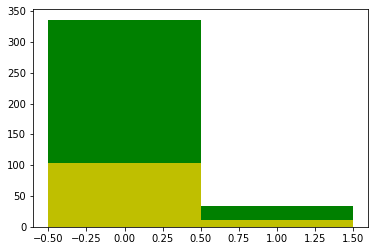

Bowler's Hitrate  :  0.08943089430894309
Bowlership's Hitrate  :  0.09565217391304348


Bowler's Skew     :  2.8775045556058596
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  6.280032467532468
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


Sikandar Raza AG Cremer


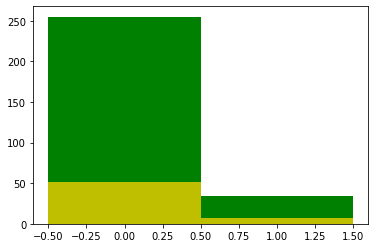

Bowler's Hitrate  :  0.11764705882352941
Bowlership's Hitrate  :  0.1206896551724138


Bowler's Skew     :  2.37346441585572
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  3.6333333333333337
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


Sikandar Raza SC Williams


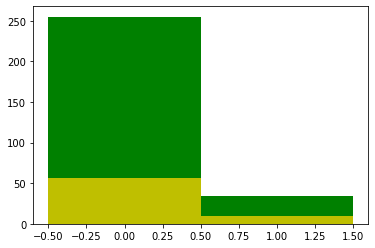

Bowler's Hitrate  :  0.11764705882352941
Bowlership's Hitrate  :  0.15151515151515152


Bowler's Skew     :  2.37346441585572
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  3.6333333333333337
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


Sohail Tanvir Umar Gul


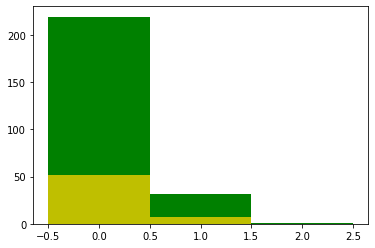

Bowler's Hitrate  :  0.13147410358565736
Bowlership's Hitrate  :  0.11864406779661017


Bowler's Skew     :  2.457540179222204
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  4.981592416721059
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


T Panyangara TL Chatara


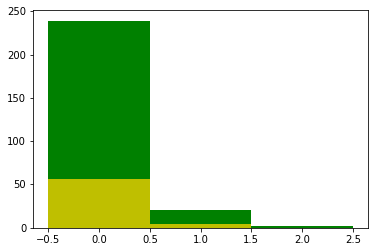

Bowler's Hitrate  :  0.09541984732824428
Bowlership's Hitrate  :  0.06666666666666667


Bowler's Skew     :  3.436901398710367
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  11.942156146768319
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


TA Boult TG Southee


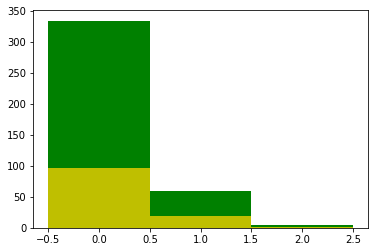

Bowler's Hitrate  :  0.16876574307304787
Bowlership's Hitrate  :  0.1810344827586207


Bowler's Skew     :  2.2281661745784724
Bowlership's Skew :  0.6072382828474424
Bowler's Kurtosis     :  4.1849766489129125
Bowlership's Kurtosis :  -1.5


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


TA Boult MJ Henry


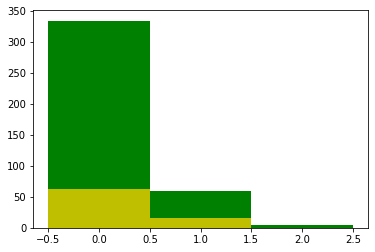

Bowler's Hitrate  :  0.16876574307304787
Bowlership's Hitrate  :  0.19230769230769232


Bowler's Skew     :  2.2281661745784724
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  4.1849766489129125
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


TG Southee TA Boult


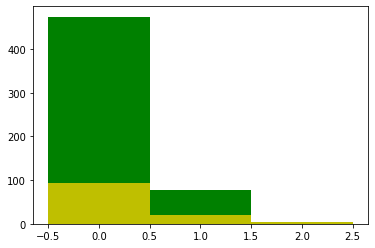

Bowler's Hitrate  :  0.15467625899280577
Bowlership's Hitrate  :  0.21551724137931033


Bowler's Skew     :  2.2930374881073075
Bowlership's Skew :  0.6218089836845981
Bowler's Kurtosis     :  4.383680751642519
Bowlership's Kurtosis :  -1.4999999999999996


Greater : Statistics=6.00, p=0.33 
Two-Sided : Statistics=6.00, p=0.66 
Less : Statistics=6.00, p=0.81 

____________________________________________


TG Southee KD Mills


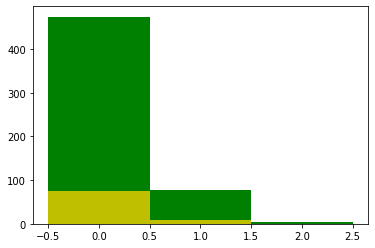

Bowler's Hitrate  :  0.15467625899280577
Bowlership's Hitrate  :  0.10714285714285714


Bowler's Skew     :  2.2930374881073075
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  4.383680751642519
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


TL Chatara T Panyangara


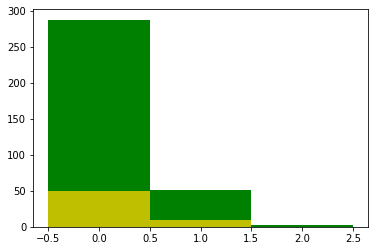

Bowler's Hitrate  :  0.16129032258064516
Bowlership's Hitrate  :  0.16666666666666666


Bowler's Skew     :  2.149474047725003
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  3.553030415964776
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


TT Bresnan SCJ Broad


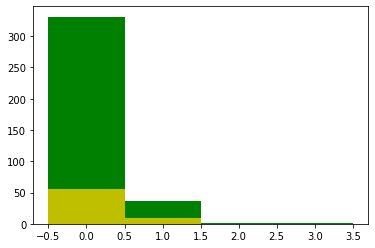

Bowler's Hitrate  :  0.11859838274932614
Bowlership's Hitrate  :  0.13846153846153847


Bowler's Skew     :  3.5064491487627514
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  15.145113579080824
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.76 
Two-Sided : Statistics=3.00, p=0.82 
Less : Statistics=3.00, p=0.41 

____________________________________________


TT Bresnan JM Anderson


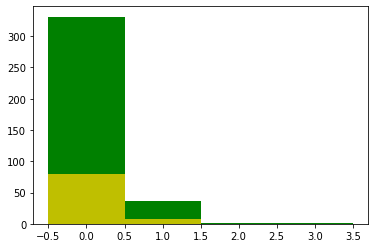

Bowler's Hitrate  :  0.11859838274932614
Bowlership's Hitrate  :  0.08139534883720931


Bowler's Skew     :  3.5064491487627514
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  15.145113579080824
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.76 
Two-Sided : Statistics=3.00, p=0.82 
Less : Statistics=3.00, p=0.41 

____________________________________________


UT Yadav Mohammed Shami


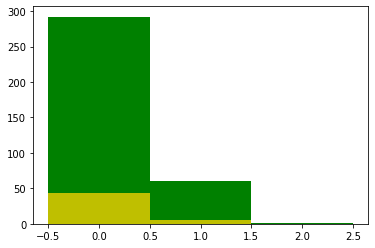

Bowler's Hitrate  :  0.17563739376770537
Bowlership's Hitrate  :  0.12


Bowler's Skew     :  1.8495848879957981
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  1.8887568873572258
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


Umar Gul Sohail Tanvir


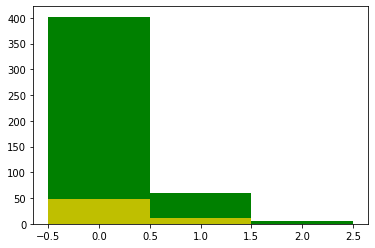

Bowler's Hitrate  :  0.14989293361884368
Bowlership's Hitrate  :  0.1864406779661017


Bowler's Skew     :  2.5049213807469064
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  5.7111534970383016
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________


Umar Gul Saeed Ajmal


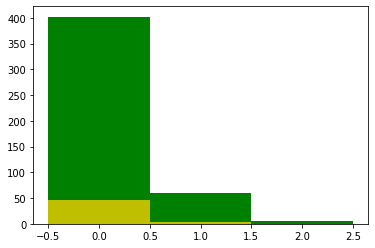

Bowler's Hitrate  :  0.14989293361884368
Bowlership's Hitrate  :  0.08


Bowler's Skew     :  2.5049213807469064
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  5.7111534970383016
Bowlership's Kurtosis :  -2.0


Greater : Statistics=5.00, p=0.19 
Two-Sided : Statistics=5.00, p=0.39 
Less : Statistics=5.00, p=0.93 

____________________________________________


Wahab Riaz Mohammad Hafeez


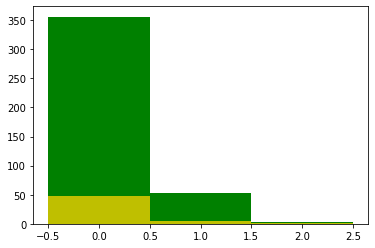

Bowler's Hitrate  :  0.14320388349514562
Bowlership's Hitrate  :  0.1509433962264151


Bowler's Skew     :  2.457845063632509
Bowlership's Skew :  0.7021868299668038
Bowler's Kurtosis     :  5.292952163933553
Bowlership's Kurtosis :  -1.5000000000000004


Greater : Statistics=7.00, p=0.19 
Two-Sided : Statistics=7.00, p=0.38 
Less : Statistics=7.00, p=0.90 

____________________________________________


YS Chahal Kuldeep Yadav


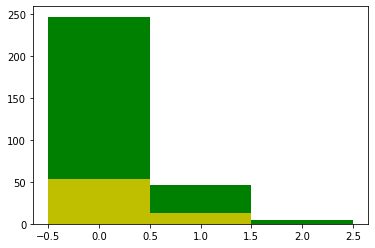

Bowler's Hitrate  :  0.18181818181818182
Bowlership's Hitrate  :  0.19402985074626866


Bowler's Skew     :  2.183190239233726
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  4.045751435612912
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.61 
Two-Sided : Statistics=3.00, p=0.77 
Less : Statistics=3.00, p=0.61 

____________________________________________


YS Chahal HH Pandya


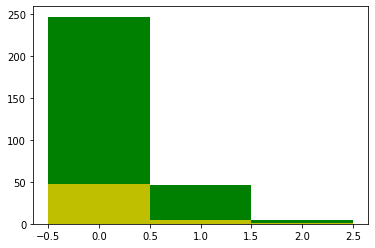

Bowler's Hitrate  :  0.18181818181818182
Bowlership's Hitrate  :  0.11538461538461539


Bowler's Skew     :  2.183190239233726
Bowlership's Skew :  0.6963126479327636
Bowler's Kurtosis     :  4.045751435612912
Bowlership's Kurtosis :  -1.4999999999999996


Greater : Statistics=6.50, p=0.25 
Two-Sided : Statistics=6.50, p=0.51 
Less : Statistics=6.50, p=0.87 

____________________________________________


Yuvraj Singh Harbhajan Singh


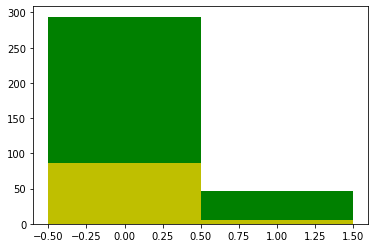

Bowler's Hitrate  :  0.13529411764705881
Bowlership's Hitrate  :  0.06451612903225806


Bowler's Skew     :  2.13254939751934
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  2.5477669328601005
Bowlership's Kurtosis :  -2.0


Greater : Statistics=3.00, p=0.35 
Two-Sided : Statistics=3.00, p=0.70 
Less : Statistics=3.00, p=0.88 

____________________________________________


Z Khan AB Agarkar


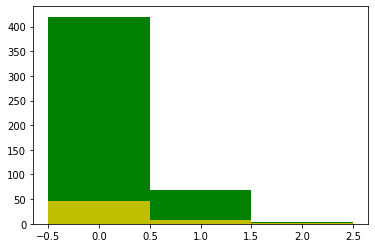

Bowler's Hitrate  :  0.15447154471544716
Bowlership's Hitrate  :  0.21428571428571427


Bowler's Skew     :  2.336356892381626
Bowlership's Skew :  0.6571386965806871
Bowler's Kurtosis     :  4.66966737177768
Bowlership's Kurtosis :  -1.5000000000000002


Greater : Statistics=7.00, p=0.19 
Two-Sided : Statistics=7.00, p=0.38 
Less : Statistics=7.00, p=0.90 

____________________________________________


Z Khan MM Patel


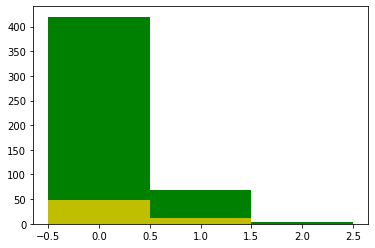

Bowler's Hitrate  :  0.15447154471544716
Bowlership's Hitrate  :  0.2


Bowler's Skew     :  2.336356892381626
Bowlership's Skew :  0.0
Bowler's Kurtosis     :  4.66966737177768
Bowlership's Kurtosis :  -2.0


Greater : Statistics=4.00, p=0.39 
Two-Sided : Statistics=4.00, p=0.77 
Less : Statistics=4.00, p=0.81 

____________________________________________




In [22]:
from collections import Counter 
from scipy.stats import skew, kurtosis
from scipy.stats import mannwhitneyu

for name in Bpartner_qualified.keys():
    dfbowler = og_data.loc[og_data['bowler'] == name]
    for pname in Bpartner_qualified[name]:
        print(name,pname)
        dfpairab = paired_data.loc[paired_data['bowler1']==name] 
        dfpairab = dfpairab.loc[dfpairab['bowler2']==pname]
        dfpairba = paired_data.loc[paired_data['bowler2']==name]
        dfpairba = dfpairba.loc[dfpairba['bowler1']==pname]

        dict_1 = Counter(dict(dfpairab['wicket1'].value_counts())) 
        dict_2 = Counter(dict(dfpairba['wicket2'].value_counts()))
        fin_dict = dict(dict_1 + dict_2)
        fin_df = pd.DataFrame(fin_dict.items())
        
        pure_dict = dict(dfbowler['wicket'].value_counts())
        plt.bar(*zip(*pure_dict.items()),color='g',width=1.0)
        plt.bar(*zip(*fin_dict.items()),color='y',width=1.0)
        
        plt.show()
        
        s=0
        d=0
        for k,v in pure_dict.items():
            s = s + k*v
            d = d + v
        bh = s/d
        print("Bowler's Hitrate  : ",bh)
        s=0
        d=0
        for k,v in fin_dict.items():
            s = s + k*v
            d = d + v
        bsh = s/d 
        print("Bowlership's Hitrate  : ",bsh)
        print('\n')
        
        print("Bowler's Skew     : ",skew(dfbowler['wicket'].dropna()))
        print("Bowlership's Skew : ",skew((fin_df[1].dropna())))
        
        print("Bowler's Kurtosis     : ",kurtosis(dfbowler['wicket'].dropna()))
        print("Bowlership's Kurtosis : ",kurtosis((fin_df[1].dropna())))
        
        print('\n')
        
        alpha = 0.05

        batch_1 = dfbowler['wicket'].value_counts()
        batch_2 = fin_df[1]

        stat1, p_value1 = mannwhitneyu(batch_1, batch_2, alternative="greater") 
        print('Greater : Statistics=%.2f, p=%.2f ' % (stat1, p_value1)) 

        #if p_value1 < alpha: 
            #print('Reject Null Hypothesis => batch1 NOT GREATER than batch2') 
        #else: 
            #print('Do not Reject Null Hypothesis => batch1 GREATER THAN EQUAL TO batch2')

        stat2, p_value2 = mannwhitneyu(batch_1, batch_2, alternative="two-sided") 
        print('Two-Sided : Statistics=%.2f, p=%.2f ' % (stat2, p_value2)) 

        #if p_value2 < alpha: 
            #print('Reject Null Hypothesis => batch1 NOT EQUAL to batch2') 
        #else: 
            #print('Do not Reject Null Hypothesis => batch1 is EQUAL to batch2')

        stat3, p_value3 = mannwhitneyu(batch_1, batch_2, alternative="less") 
        print('Less : Statistics=%.2f, p=%.2f \n' % (stat3, p_value3)) 

        #if p_value3 < alpha: 
            #print('Reject Null Hypothesis => batch1 NOT LESS than batch2') 
        #else: 
            #print('Do not Reject Null Hypothesis => batch1 LESS THAN EQUAL TO batch2')

        if (p_value1 < alpha) and (p_value2 < alpha):
            print(name,"-",pname,"better than",name)
        if (p_value3 < alpha) and (p_value2 < alpha):
            print(name,"-",pname, "worse than",name)
        
        print('____________________________________________\n\n')
#print(fin_dict)
#print(fin_df)